In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from ISLP.models import (ModelSpec as MS, summarize, poly)
import lmdiag

In [2]:
df = pd.read_csv("Auto.csv")
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [3]:
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df = df.dropna()
df = df.drop(columns = 'name')
df.origin = df.origin.astype(str)
df = pd.get_dummies(df, drop_first=True) #doing a few cleaning and data adjustments
#since horsepower needs to be numeric, transforming the str to int and removing the NaN from the data set
#droping the column name since it will not be used

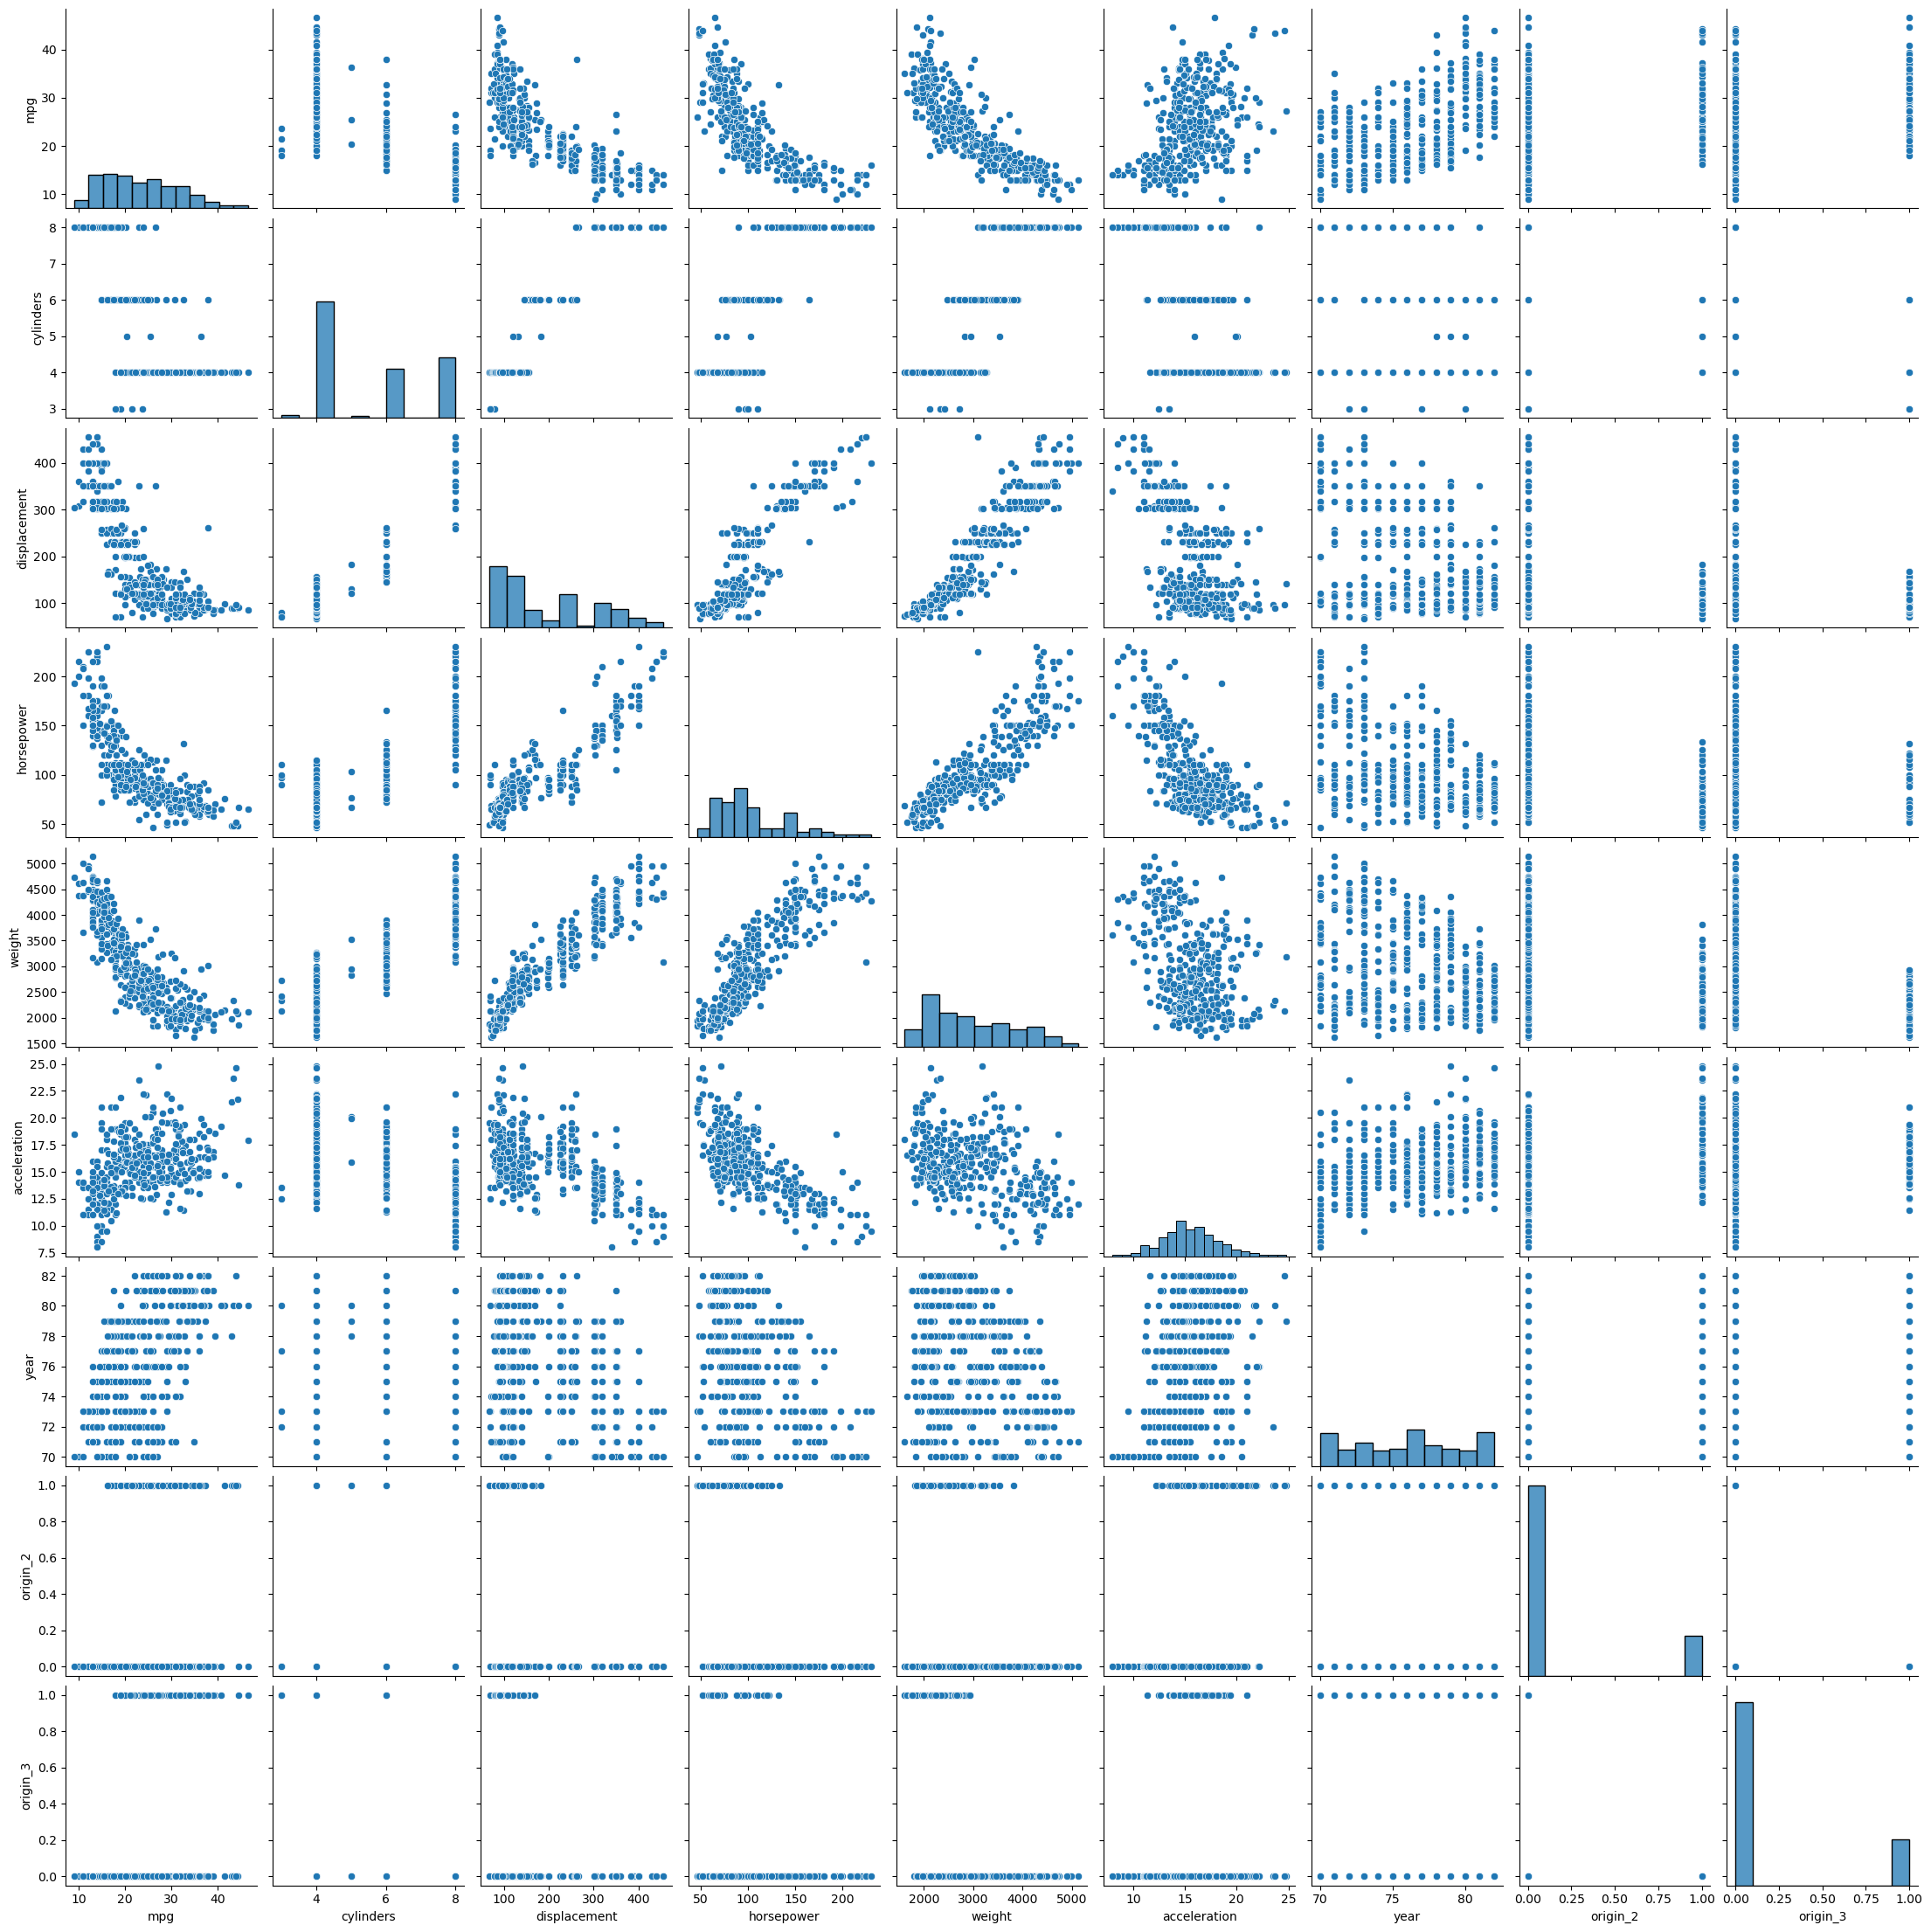

In [4]:
sns.pairplot(df) #ploting the scatter matrix

In [5]:
df.corr()
# the correlation matrix

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin_2,origin_3
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.244313,0.451454
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.352324,-0.404209
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.371633,-0.440825
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.284948,-0.321936
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.293841,-0.447929
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.208298,0.115020
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,-0.037745,0.199841
origin_2,0.244313,-0.352324,-0.371633,-0.284948,-0.293841,0.208298,-0.037745,1.000000,-0.230157
origin_3,0.451454,-0.404209,-0.440825,-0.321936,-0.447929,0.115020,0.199841,-0.230157,1.000000


In [6]:
y = df['mpg']
x = df.drop(columns = 'mpg')
x = sm.add_constant(x)
lm = sm.OLS(y,x)
model = lm.fit()
summarize(model)
# doing the multiple linear regression fit 

,coef,std err,t,P>|t|
const,-17.9546,4.677,-3.839,0.000
cylinders,-0.4897,0.321,-1.524,0.128
displacement,0.0240,0.008,3.133,0.002
horsepower,-0.0182,0.014,-1.326,0.185
weight,-0.0067,0.001,-10.243,0.000
acceleration,0.0791,0.098,0.805,0.421
year,0.7770,0.052,15.005,0.000
origin_2,2.6300,0.566,4.643,0.000
origin_3,2.8532,0.553,5.162,0.000


In [7]:
from statsmodels.formula.api import ols
df_lm = ols('mpg ~ cylinders + displacement	+ horsepower + weight + acceleration + year + origin_2 + origin_3', data = df).fit()
sm.stats.anova_lm(df_lm, typ = 1)
#doing the necessary fits and calculation to get the ANOVA table

,df,sum_sq,mean_sq,F,PR(>F)
cylinders,1.0,14403.083079,14403.083079,1317.378751,4.991337e-126
displacement,1.0,1073.344025,1073.344025,98.173468,9.390980e-21
horsepower,1.0,403.408069,403.408069,36.897740,3.003965e-09
weight,1.0,975.724953,975.724953,89.244734,3.521249e-19
acceleration,1.0,0.966071,0.966071,0.088362,7.664315e-01
year,1.0,2419.120249,2419.120249,221.264961,8.013075e-40
origin_2,1.0,64.627594,64.627594,5.911166,1.550314e-02
origin_3,1.0,291.327753,291.327753,26.646308,3.933208e-07
Residual,383.0,4187.391678,10.933138,NaN,NaN


<module 'matplotlib.pyplot' from '/Users/giu/anaconda3/lib/python3.11/site-packages/matplotlib/pyplot.py'>

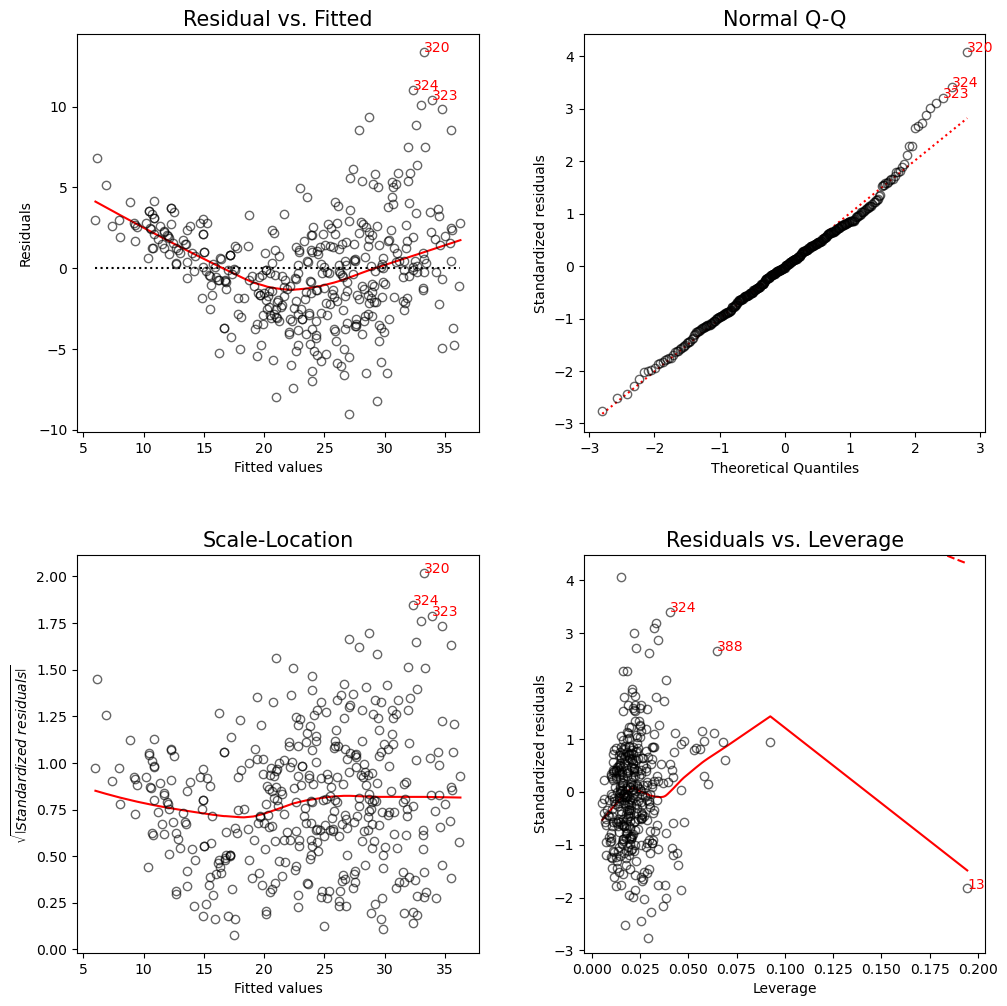

In [8]:
plt.figure(figsize=(10,10))
lmdiag.plot(model) # using the lmdiag library in order to do the dianostic plots for the fitted values

In [9]:
X = MS(['cylinders', 'displacement' , 'horsepower' , 'weight', 'acceleration', 'year', 'origin_2', 'origin_3', 
        ('cylinders', 'displacement' , 'horsepower' , 'weight', 'acceleration', 'year', 'origin_2', 'origin_3')]).fit_transform(df)
model2 = sm.OLS(y, X)
summarize(model2.fit())

/Users/giu/anaconda3/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1965: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


,coef,std err,t,P>|t|
intercept,-17.9546,4.677,-3.839,0.000
cylinders,-0.4897,0.321,-1.524,0.128
displacement,0.0240,0.008,3.133,0.002
horsepower,-0.0182,0.014,-1.326,0.185
weight,-0.0067,0.001,-10.243,0.000
acceleration,0.0791,0.098,0.805,0.421
year,0.7770,0.052,15.005,0.000
origin_2,2.6300,0.566,4.643,0.000
origin_3,2.8532,0.553,5.162,0.000
cylinders:displacement:horsepower:weight:acceleration:year:origin_2:origin_3,0.0000,0.000,NaN,NaN


In [10]:
X = MS([poly('cylinders', degree=2),poly('horsepower' , degree=2),poly('displacement', degree=2),poly('weight',  degree=2),poly('acceleration',  degree=2),poly('year',  degree=2),poly('origin_2', degree=2),poly('origin_3', degree=2)]).fit_transform(df)
model3 = sm.OLS(y, X)
results3 = model3.fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     197.0
Date:                Wed, 25 Oct 2023   Prob (F-statistic):          1.24e-163
Time:                        19:18:08   Log-Likelihood:                -946.00
No. Observations:                 392   AIC:                             1922.
Df Residuals:                     377   BIC:                             1982.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
intercept                          23.6772      0.169    139.950      0.000      23.345      24.010
poly(cylinders, degree=2)[0]       13.8556     10.809      1.282      0.201      -7.398      35.109
poly(cylinders, degree=2)[1]       -1.5780      3.873     -0.407      0.684      -9.193       6.037
poly(horsepower, degree=2)[0]     -51.7980     10.296     -5.031      0.000     -72.042     -31.554
poly(horsepower, degree=2)[1]      12.3555      5.067      2.438      0.015       2.391      22.319
poly(displacement, degree=2)[0]   -17.4481     16.699     -1.045      0.297     -50.283      15.387
poly(displacement, degree=2)[1]     6.8516      7.162      0.957      0.339      -7.230      20.933
poly(weight, degree=2)[0]         -58.4689     12.080     -4.840      0.000     -82.221     -34.717
poly(weight, degree=2)[1]          20.7826      4.973      4.179      0.000      11.005      30.560
poly(acceleration, degree=2)[0]   -12.9033      5.390     -2.394      0.017     -23.502      -2.305
poly(acceleration, degree=2)[1]    10.3880      3.769      2.756      0.006       2.977      17.799
poly(year, degree=2)[0]            56.6081      3.237     17.488      0.000      50.243      62.973
poly(year, degree=2)[1]            16.6217      2.954      5.626      0.000      10.813      22.431
poly(origin_2, degree=2)[0]         6.1244      2.910      2.105      0.036       0.403      11.846
poly(origin_2, degree=2)[1]        -3.5162      1.788     -1.966      0.050      -7.033       0.000
poly(origin_3, degree=2)[0]         2.6984      0.901      2.994      0.003       0.926       4.470
poly(origin_3, degree=2)[1]         3.8839      1.688      2.301      0.022       0.565       7.203
==============================================================================
Omnibus:                       33.960   Durbin-Watson:                   1.666
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.577
Skew:                           0.392   Prob(JB):                     2.14e-20
Kurtosis:                       5.220   Cond. No.                     1.36e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.12e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [11]:
data_log = np.log(df+1) #adding 1 tto avoid -infty error
y = df['mpg']
X = data_log.drop(columns = 'mpg')
X = sm.add_constant(X)
lm = sm.OLS(y,X)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     267.3
Date:                Wed, 25 Oct 2023   Prob (F-statistic):          1.33e-151
Time:                        19:18:08   Log-Likelihood:                -991.79
No. Observations:                 392   AIC:                             2002.
Df Residuals:                     383   BIC:                             2037.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -71.0756     17.956     -3.958      0.000    -106.380     -35.771
cylinders        1.7652      1.970      0.896      0.371      -2.108       5.639
displacement    -0.7595      1.587     -0.479      0.633      -3.880       2.361
horsepower      -6.7465      1.596     -4.228      0.000      -9.884      -3.609
weight         -13.2023      2.316     -5.699      0.000     -17.757      -8.648
acceleration    -4.9880      1.733     -2.878      0.004      -8.395      -1.581
year            56.3348      3.709     15.188      0.000      49.042      63.628
origin_2         2.0327      0.820      2.479      0.014       0.421       3.645
origin_3         2.4682      0.809      3.051      0.002       0.878       4.059
==============================================================================
Omnibus:                       38.063   Durbin-Watson:                   1.381
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.888
Skew:                           0.561   Prob(JB):                     9.02e-17
Kurtosis:                       4.806   Cond. No.                     1.40e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
data_sqrt = np.sqrt(df)
y = df['mpg']
x = data_sqrt.drop(columns = 'mpg')
x = sm.add_constant(x)
lm = sm.OLS(y,x)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     242.4
Date:                Wed, 25 Oct 2023   Prob (F-statistic):          9.23e-145
Time:                        19:18:08   Log-Likelihood:                -1008.0
No. Observations:                 392   AIC:                             2034.
Df Residuals:                     383   BIC:                             2070.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -49.6980      9.289     -5.350      0.000     -67.962     -31.434
cylinders       -0.3383      1.535     -0.220      0.826      -3.357       2.680
displacement     0.3239      0.236      1.371      0.171      -0.141       0.788
horsepower      -0.7488      0.308     -2.433      0.015      -1.354      -0.144
weight          -0.6522      0.081     -8.066      0.000      -0.811      -0.493
acceleration    -0.7290      0.834     -0.874      0.383      -2.370       0.912
year            13.1227      0.879     14.921      0.000      11.393      14.852
origin_2         2.1497      0.572      3.758      0.000       1.025       3.275
origin_3         2.3549      0.561      4.198      0.000       1.252       3.458
==============================================================================
Omnibus:                       32.960   Durbin-Watson:                   1.303
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.363
Skew:                           0.535   Prob(JB):                     5.77e-13
Kurtosis:                       4.519   Cond. No.                     3.35e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### PART 2

In [13]:
df = pd.read_csv("AirQuality.csv")
print(df.isnull().any())
print(df.dtypes)

No       False
year     False
month    False
day      False
hour     False
pm2.5     True
DEWP     False
TEMP     False
PRES     False
cbwd     False
Iws      False
Is       False
Ir       False
dtype: bool
No         int64
year       int64
month      int64
day        int64
hour       int64
pm2.5    float64
DEWP       int64
TEMP     float64
PRES     float64
cbwd      object
Iws      float64
Is         int64
Ir         int64
dtype: object


In [14]:
df = df.dropna()
df

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
24,25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0
25,26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0
26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0
27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0
28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0


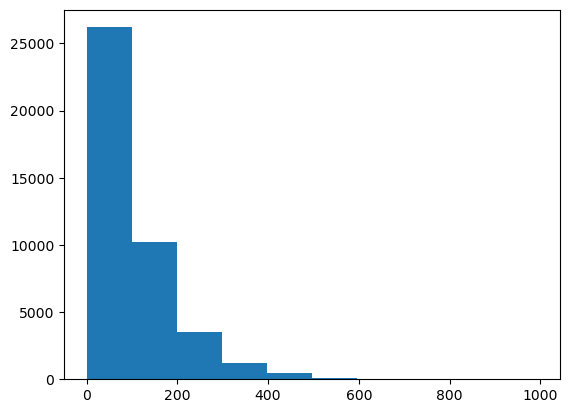

In [15]:
plt.hist(df['pm2.5'])
plt.show()

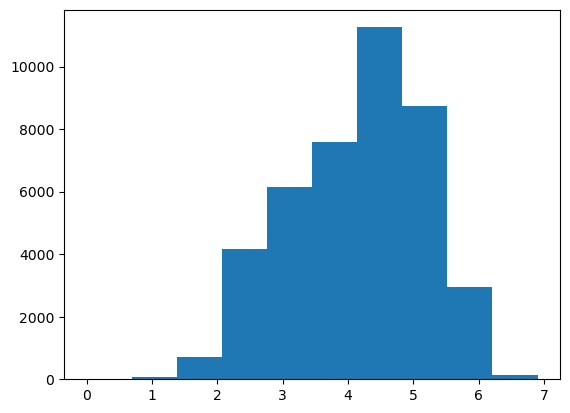

In [16]:
df = df[df['pm2.5'] != 0]
plt.hist(np.log(df['pm2.5']))
plt.show()

<Axes: xlabel='year', ylabel='pm2.5'>

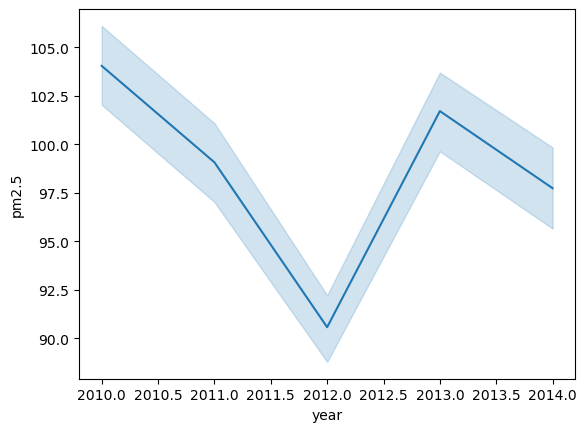

In [17]:
sns.lineplot(data=df, x = 'year', y = 'pm2.5')

<Axes: xlabel='month'>

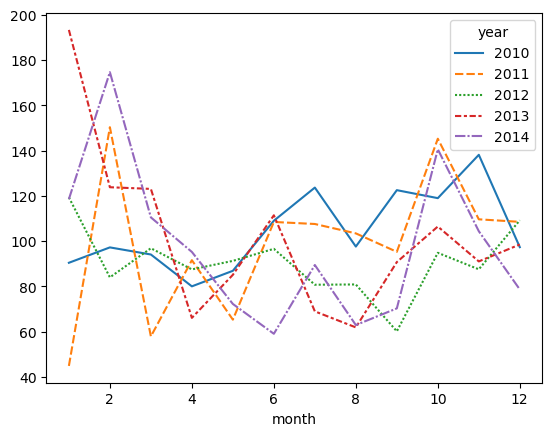

In [18]:
df_wide = df.pivot_table(index='month', columns= 'year', values='pm2.5')
sns.lineplot(data=df_wide)

<Axes: xlabel='day'>

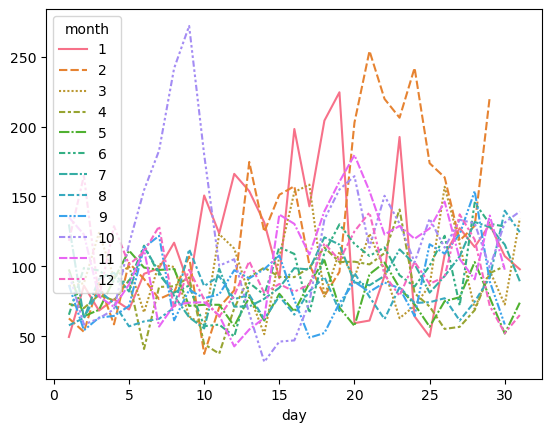

In [19]:
df_daymonth = df.pivot_table(index='day', columns= 'month', values='pm2.5')
sns.lineplot(data=df_daymonth)

<Axes: xlabel='hour'>

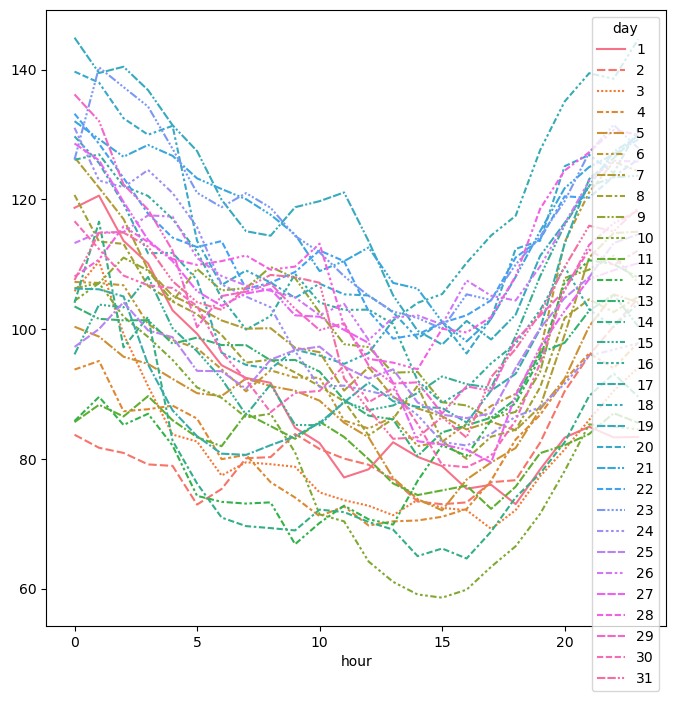

In [20]:
df_dayhour = df.pivot_table(index='hour', columns= 'day', values='pm2.5')
plt.figure(figsize = (8,8))
sns.lineplot(data=df_dayhour)

In [21]:
df.corr()

/var/folders/2j/cgxlgwmd4pg23dn49wtq0lzw0000gn/T/ipykernel_21047/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
No,1.000000,0.979770,0.197030,0.017884,0.000640,-0.017700,0.053957,0.088671,-0.025998,-0.064067,-0.032230,-0.018064
year,0.979770,1.000000,-0.002451,-0.000101,0.000200,-0.014692,0.007297,0.055658,-0.013466,-0.068287,-0.019549,-0.026298
month,0.197030,-0.002451,1.000000,0.006853,-0.000548,-0.024033,0.234519,0.172113,-0.066325,0.014568,-0.062882,0.038879
day,0.017884,-0.000101,0.006853,1.000000,0.000317,0.082867,0.033582,0.022820,-0.010511,-0.005137,-0.037446,-0.000093
hour,0.000640,0.000200,-0.000548,0.000317,1.000000,-0.023110,-0.021777,0.149438,-0.041830,0.058848,-0.002454,-0.008740
pm2.5,-0.017700,-0.014692,-0.024033,0.082867,-0.023110,1.000000,0.171397,-0.090497,-0.047273,-0.247695,0.019262,-0.051377
DEWP,0.053957,0.007297,0.234519,0.033582,-0.021777,0.171397,1.000000,0.823868,-0.777727,-0.293076,-0.034928,0.125338
TEMP,0.088671,0.055658,0.172113,0.022820,0.149438,-0.090497,0.823868,1.000000,-0.826923,-0.149758,-0.094784,0.049550
PRES,-0.025998,-0.013466,-0.066325,-0.010511,-0.041830,-0.047273,-0.777727,-0.826923,1.000000,0.178885,0.070538,-0.080531
Iws,-0.064067,-0.068287,0.014568,-0.005137,0.058848,-0.247695,-0.293076,-0.149758,0.178885,1.000000,0.022645,-0.009140


In [22]:
time = ['month', 'day', 'hour']
den = [12,30,24]
for x, y in zip(time,den):
    df[x+'_cos'] = np.cos(2*np.pi*df[x]/y)
    df[x+'_sin'] = np.sin(2*np.pi*df[x]/y)
    df = df.drop(columns = x)

df
#performing the calculation, the removal and adding the columns related to month, day and hour

/var/folders/2j/cgxlgwmd4pg23dn49wtq0lzw0000gn/T/ipykernel_21047/1322422933.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[x+'_cos'] = np.cos(2*np.pi*df[x]/y)
/var/folders/2j/cgxlgwmd4pg23dn49wtq0lzw0000gn/T/ipykernel_21047/1322422933.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[x+'_sin'] = np.sin(2*np.pi*df[x]/y)


,No,year,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,month_cos,month_sin,day_cos,day_sin,hour_cos,hour_sin
24,25,2010,129.0,-16,-4.0,1020.0,SE,1.79,0,0,0.866025,5.000000e-01,0.913545,0.406737,1.000000,0.000000
25,26,2010,148.0,-15,-4.0,1020.0,SE,2.68,0,0,0.866025,5.000000e-01,0.913545,0.406737,0.965926,0.258819
26,27,2010,159.0,-11,-5.0,1021.0,SE,3.57,0,0,0.866025,5.000000e-01,0.913545,0.406737,0.866025,0.500000
27,28,2010,181.0,-7,-5.0,1022.0,SE,5.36,1,0,0.866025,5.000000e-01,0.913545,0.406737,0.707107,0.707107
28,29,2010,138.0,-7,-5.0,1022.0,SE,6.25,2,0,0.866025,5.000000e-01,0.913545,0.406737,0.500000,0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,8.0,-23,-2.0,1034.0,NW,231.97,0,0,1.000000,-2.449294e-16,0.978148,0.207912,0.258819,-0.965926
43820,43821,2014,10.0,-22,-3.0,1034.0,NW,237.78,0,0,1.000000,-2.449294e-16,0.978148,0.207912,0.500000,-0.866025
43821,43822,2014,10.0,-22,-3.0,1034.0,NW,242.70,0,0,1.000000,-2.449294e-16,0.978148,0.207912,0.707107,-0.707107
43822,43823,2014,8.0,-22,-4.0,1034.0,NW,246.72,0,0,1.000000,-2.449294e-16,0.978148,0.207912,0.866025,-0.500000


In [23]:
from sklearn.model_selection import train_test_split
X = df[['No','year','DEWP','TEMP','PRES','cbwd','Iws','Is','Ir','month_cos','month_sin','day_cos','day_sin','hour_cos','hour_sin']]
cbwd = {'NE':1, 'NW': 2, 'SE':3, 'cv':4}
X['cbwd'] = X['cbwd'].map(cbwd)
y= df['pm2.5']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33)

/var/folders/2j/cgxlgwmd4pg23dn49wtq0lzw0000gn/T/ipykernel_21047/2470380467.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cbwd'] = X['cbwd'].map(cbwd)


In [24]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
pd.DataFrame(zip(X.columns, model.coef_))

,0,1
0,No,0.001028
1,year,-9.417988
2,DEWP,7.778328
3,TEMP,-2.583400
4,PRES,-1.888925
5,cbwd,7.222370
6,Iws,-0.122474
7,Is,-5.467195
8,Ir,-5.968397
9,month_cos,113.934868


In [25]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean squared error: ", mse)
print("R-squared: ", r2)

Mean squared error:  5010.880157786553
R-squared:  0.39583768521645557


In [26]:
df.corr()

/var/folders/2j/cgxlgwmd4pg23dn49wtq0lzw0000gn/T/ipykernel_21047/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,No,year,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,month_cos,month_sin,day_cos,day_sin,hour_cos,hour_sin
No,1.000000,0.979770,-0.017700,0.053957,0.088671,-0.025998,-0.064067,-0.032230,-0.018064,0.037262,-0.162248,0.015104,-0.013336,-0.000161,0.000745
year,0.979770,1.000000,-0.014692,0.007297,0.055658,-0.013466,-0.068287,-0.019549,-0.026298,-0.006043,-0.010033,0.013685,-0.001576,-0.000323,0.001174
pm2.5,-0.017700,-0.014692,1.000000,0.171397,-0.090497,-0.047273,-0.247695,0.019262,-0.051377,0.106038,0.019737,-0.006870,-0.094146,0.094420,0.022142
DEWP,0.053957,0.007297,0.171397,1.000000,0.823868,-0.777727,-0.293076,-0.034928,0.125338,-0.707914,-0.546897,0.016946,-0.033959,0.038550,0.030920
TEMP,0.088671,0.055658,-0.090497,0.823868,1.000000,-0.826923,-0.149758,-0.094784,0.049550,-0.798889,-0.427540,0.026862,-0.010357,-0.178478,-0.189973
PRES,-0.025998,-0.013466,-0.047273,-0.777727,-0.826923,1.000000,0.178885,0.070538,-0.080531,0.790242,0.256982,-0.025579,-0.006175,0.009309,0.071350
Iws,-0.064067,-0.068287,-0.247695,-0.293076,-0.149758,0.178885,1.000000,0.022645,-0.009140,0.126058,0.102610,0.009237,0.030971,0.009589,-0.077649
Is,-0.032230,-0.019549,0.019262,-0.034928,-0.094784,0.070538,0.022645,1.000000,-0.009764,0.063151,0.062536,0.003652,0.041616,-0.021532,0.002332
Ir,-0.018064,-0.026298,-0.051377,0.125338,0.049550,-0.080531,-0.009140,-0.009764,1.000000,-0.068188,-0.076790,0.000126,-0.007771,0.005174,0.007774
month_cos,0.037262,-0.006043,0.106038,-0.707914,-0.798889,0.790242,0.126058,0.063151,-0.068188,1.000000,-0.005517,-0.009783,0.006145,0.000356,-0.000308


In [27]:
X = df[['DEWP', 'Iws','month_cos','month_sin','day_cos', 'day_sin']]
y= df['pm2.5']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33)

In [28]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [29]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean squared error: ", mse)
print("R-squared: ", r2)

Mean squared error:  5325.220239183287
R-squared:  0.35996583939453397
